# Event Study of Chartered SemiConductor Manufacturing Rights Issue 

Event date on September 2, 2002 (Monday). News was in morning of 2 Sep before start of stock market trading.

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('CSM_Event_Study.csv') ### need to ensure numbers are in numbers, not general or other formats in CSV
print(df)

          Date  CSI_Price  STI_Price  3mT_rate   CSI_Ret   STI_Ret
0     2/7/2001       4.62    1706.62      2.00  0.013072 -0.011581
1     3/7/2001       4.60    1703.27      2.00 -0.004338 -0.001965
2     4/7/2001       4.52    1693.71      2.01 -0.017544 -0.005629
3     5/7/2001       4.52    1688.02      2.03  0.000000 -0.003365
4     6/7/2001       4.38    1660.76      2.04 -0.031463 -0.016281
..         ...        ...        ...       ...       ...       ...
298   6/9/2002       1.61    1442.58      0.85  0.006231 -0.003591
299   9/9/2002       1.55    1423.89      0.90 -0.037979 -0.013041
300  10/9/2002       1.56    1447.88      0.95  0.006431  0.016708
301  11/9/2002       1.53    1448.48      0.96 -0.019418  0.000414
302  12/9/2002       1.51    1433.43      0.96 -0.013158 -0.010445

[303 rows x 6 columns]


Data have been cleaned to remove weekend and holiday retirms of zeros since prices are reported as stagnant on these days from the previous trading day.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       303 non-null    object 
 1   CSI_Price  303 non-null    float64
 2   STI_Price  303 non-null    float64
 3   3mT_rate   303 non-null    float64
 4   CSI_Ret    303 non-null    float64
 5   STI_Ret    303 non-null    float64
dtypes: float64(5), object(1)
memory usage: 14.3+ KB


Selecting only rows from -250 days to -11 (inclusive) trading days from event date of 2 Sep 2002 for Estimation Period

In [3]:
df1=df

In [4]:
df2=df1.iloc[44:284,]
print(df2)

          Date  CSI_Price  STI_Price  3mT_rate   CSI_Ret   STI_Ret
44    3/9/2001       4.64    1615.51      2.06  0.004320 -0.002232
45    4/9/2001       4.84    1620.55      2.05  0.042200  0.003115
46    5/9/2001       4.66    1622.52      2.07 -0.037899  0.001215
47    6/9/2001       4.50    1608.00      2.10 -0.034938 -0.008989
48    7/9/2001       4.20    1576.95      2.10 -0.068993 -0.019499
..         ...        ...        ...       ...       ...       ...
279  12/8/2002       2.58    1486.44      0.69 -0.045462 -0.000249
280  13/8/2002       2.55    1529.03      0.69 -0.011696  0.028250
281  14/8/2002       2.56    1527.03      0.69  0.003914 -0.001309
282  15/8/2002       2.53    1531.84      0.70 -0.011788  0.003145
283  16/8/2002       2.53    1522.60      0.70  0.000000 -0.006050

[240 rows x 6 columns]


# Using Market Model as Benchmark

In [5]:
import statsmodels.api as sm
X2 = df2['STI_Ret']
Y2 = df2['CSI_Ret']
Z2 = sm.add_constant(X2)
model = sm.OLS(Y2, Z2).fit()
predictions = model.predict(Z2) 

results = model.summary()
print(results)

                            OLS Regression Results                            
Dep. Variable:                CSI_Ret   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     190.3
Date:                Wed, 13 Mar 2024   Prob (F-statistic):           3.30e-32
Time:                        15:22:46   Log-Likelihood:                 586.23
No. Observations:                 240   AIC:                            -1168.
Df Residuals:                     238   BIC:                            -1162.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0022      0.001     -1.596      0.1

The warning is letting you know that currently, you're fine to write pd.concat(dfs, self._concat_axis), but that they're planning on changing the definition of the function in a future version of pandas so that all arguments except for objs will be keyword-only. I.e., after they make this change, pd.concat(dfs, self._concat_axis) will raise an error, and you will have to write pd.concat(dfs, axis=self._concat_axis) instead. They are most likely considering making this change because calling functions with keyword arguments is often clearer and more readable for other people.

In [6]:
for attr in dir(model):
    if not attr.startswith('_'):
        print(attr)

HC0_se
HC1_se
HC2_se
HC3_se
aic
bic
bse
centered_tss
compare_f_test
compare_lm_test
compare_lr_test
condition_number
conf_int
conf_int_el
cov_HC0
cov_HC1
cov_HC2
cov_HC3
cov_kwds
cov_params
cov_type
df_model
df_resid
diagn
eigenvals
el_test
ess
f_pvalue
f_test
fittedvalues
fvalue
get_influence
get_prediction
get_robustcov_results
info_criteria
initialize
k_constant
llf
load
model
mse_model
mse_resid
mse_total
nobs
normalized_cov_params
outlier_test
params
predict
pvalues
remove_data
resid
resid_pearson
rsquared
rsquared_adj
save
scale
ssr
summary
summary2
t_test
t_test_pairwise
tvalues
uncentered_tss
use_t
wald_test
wald_test_terms
wresid


In [7]:
df3=df1.iloc[284:303,]
print(df3)

          Date  CSI_Price  STI_Price  3mT_rate   CSI_Ret   STI_Ret
284  19/8/2002       2.56    1533.41      0.70  0.011788  0.007075
285  20/8/2002       2.61    1533.61      0.70  0.019343  0.000130
286  21/8/2002       2.60    1533.47      0.71 -0.003839 -0.000091
287  22/8/2002       2.58    1542.02      0.73 -0.007722  0.005560
288  23/8/2002       2.57    1531.90      0.73 -0.003883 -0.006584
289  26/8/2002       2.50    1516.04      0.72 -0.027615 -0.010407
290  27/8/2002       2.43    1509.48      0.77 -0.028399 -0.004336
291  28/8/2002       2.36    1504.90      0.79 -0.029230 -0.003039
292  29/8/2002       2.29    1490.35      0.79 -0.030110 -0.009715
293  30/8/2002       2.10    1488.50      0.78 -0.086614 -0.001242
294   2/9/2002       1.60    1460.68      0.79 -0.271934 -0.018867
295   3/9/2002       1.59    1454.92      0.83 -0.006270 -0.003951
296   4/9/2002       1.69    1457.48      0.83  0.060995  0.001758
297   5/9/2002       1.60    1447.77      0.84 -0.054725 -0.00

In [8]:
X3 = df3['STI_Ret']
Y3 = df3['CSI_Ret']

C=model.params   ### C[0] gives intercept estimate; C[1] gives slope estimate
### Compute Abnormal Return AR
AR = Y3 - C[0] - C[1]*X3
print(AR)

284    0.004770
285    0.021350
286   -0.001544
287   -0.012772
288    0.006850
289   -0.011914
290   -0.020588
291   -0.023104
292   -0.015307
293   -0.082824
294   -0.245238
295    0.001042
296    0.060886
297   -0.043861
298    0.013074
299   -0.018855
300   -0.013107
301   -0.017780
302    0.002592
dtype: float64


C:\Users\bryan\AppData\Local\Temp\ipykernel_27800\3616258366.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  AR = Y3 - C[0] - C[1]*X3


Plot Abnormal Return Graph for -10 to +10 trading days (data here have only up to +8)

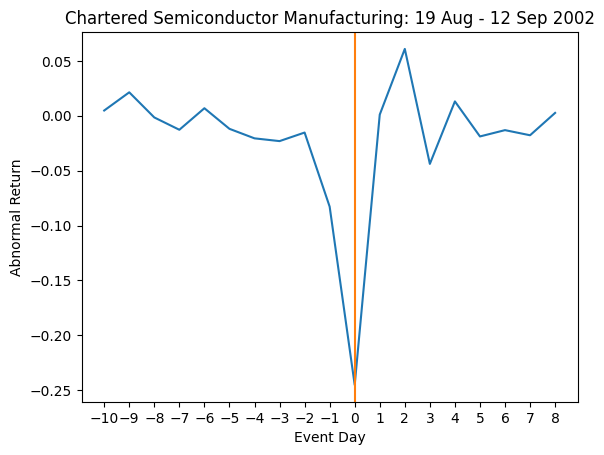

In [9]:
time = range(-10,9,1)  ### range(start, stop, step)

import matplotlib.pyplot as plt
# plotting the points 
plt.plot(time, AR)

plt.xticks([-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,+1,+2,+3,+4,+5,+6,+7,+8])

plt.plot((0, 0), (-1, 1), scaley = False)

# naming the x axis
plt.xlabel('Event Day')
# naming the y axis
plt.ylabel('Abnormal Return')
  
# giving a title to my graph
plt.title('Chartered Semiconductor Manufacturing: 19 Aug - 12 Sep 2002')
  
# function to show the plot
plt.show()

In [10]:
CAR = AR.cumsum()
print(CAR)

284    0.004770
285    0.026120
286    0.024576
287    0.011804
288    0.018654
289    0.006740
290   -0.013847
291   -0.036951
292   -0.052259
293   -0.135083
294   -0.380321
295   -0.379279
296   -0.318393
297   -0.362254
298   -0.349180
299   -0.368036
300   -0.381142
301   -0.398923
302   -0.396331
dtype: float64


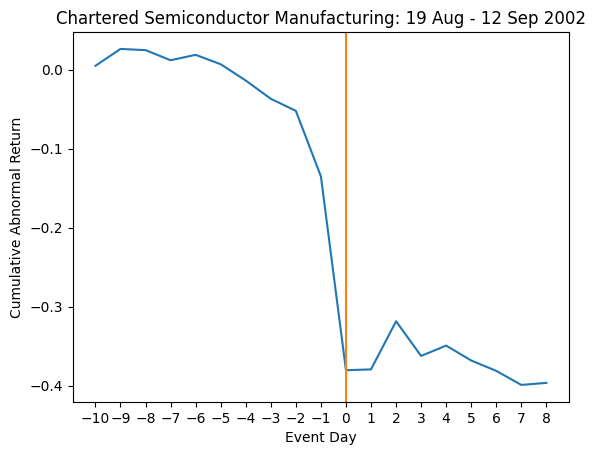

In [11]:
time = list(range(-10,9,1))  ### range(start, stop, step)

import matplotlib.pyplot as plt
# plotting the points 
plt.plot(time, CAR)

plt.xticks([-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,+1,+2,+3,+4,+5,+6,+7,+8])

plt.plot((0, 0), (-1, 1), scaley = False)

# naming the x axis
plt.xlabel('Event Day')
# naming the y axis
plt.ylabel('Cumulative Abnormal Return')
  
# giving a title to my graph
plt.title('Chartered Semiconductor Manufacturing: 19 Aug - 12 Sep 2002')
  
# function to show the plot
plt.show()

In [12]:
sigma=np.sqrt(model.mse_resid)
print(sigma)

0.02112305658209769


In [13]:
t_stat_AR=AR/sigma
print(t_stat_AR)

284     0.225816
285     1.010730
286    -0.073090
287    -0.604637
288     0.324289
289    -0.564014
290    -0.974647
291    -1.093789
292    -0.724669
293    -3.921023
294   -11.609963
295     0.049311
296     2.882444
297    -2.076472
298     0.618946
299    -0.892639
300    -0.620489
301    -0.841748
302     0.122711
dtype: float64


In [14]:
sd=np.sqrt(range(1,20,1)*(sigma**2))
print(sd)

[0.02112306 0.02987251 0.03658621 0.04224611 0.04723259 0.05174071
 0.05588635 0.05974503 0.06336917 0.06679697 0.07005725 0.07317241
 0.07616026 0.07903524 0.08180925 0.08449223 0.08709259 0.08961754
 0.09207327]


In [15]:
t_stat_CAR=CAR/sd
print(t_stat_CAR)

284    0.225816
285    0.874370
286    0.671722
287    0.279409
288    0.394938
289    0.130269
290   -0.247776
291   -0.618486
292   -0.824671
293   -2.022288
294   -5.428712
295   -5.183361
296   -4.180566
297   -4.583454
298   -4.268226
299   -4.355852
300   -4.376288
301   -4.451389
302   -4.304512
dtype: float64


# Using Market-Adjusted Return as Benchmark

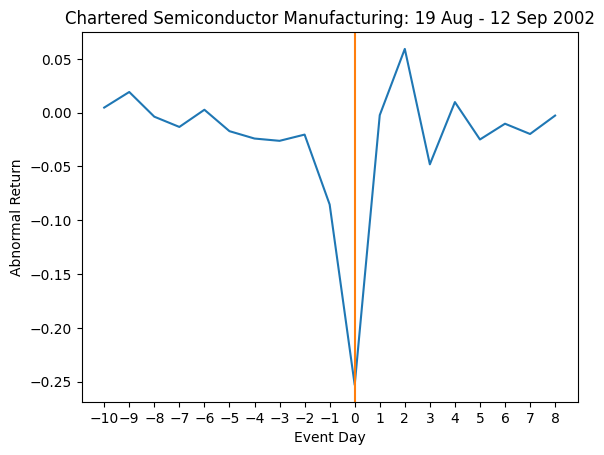

In [16]:
MAR=Y3-X3

time = range(-10,9,1)  ### range(start, stop, step)

import matplotlib.pyplot as plt
# plotting the points 
plt.plot(time, MAR)

plt.xticks([-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,+1,+2,+3,+4,+5,+6,+7,+8])

plt.plot((0, 0), (-1, 1), scaley = False)

# naming the x axis
plt.xlabel('Event Day')
# naming the y axis
plt.ylabel('Abnormal Return')
  
# giving a title to my graph
plt.title('Chartered Semiconductor Manufacturing: 19 Aug - 12 Sep 2002')
  
# function to show the plot
plt.show()

In [17]:
sd2=np.std(Y2-X2)
t_stat_MAR=MAR/sd2
print(t_stat_MAR)

284     0.219458
285     0.894554
286    -0.174486
287    -0.618430
288     0.125759
289    -0.801223
290    -1.120397
291    -1.219472
292    -0.949580
293    -3.975020
294   -11.783037
295    -0.107949
296     2.758109
297    -2.236808
298     0.457313
299    -1.161167
300    -0.478505
301    -0.923415
302    -0.126344
dtype: float64


# Using Mean-Adjusted Return as Benchmark

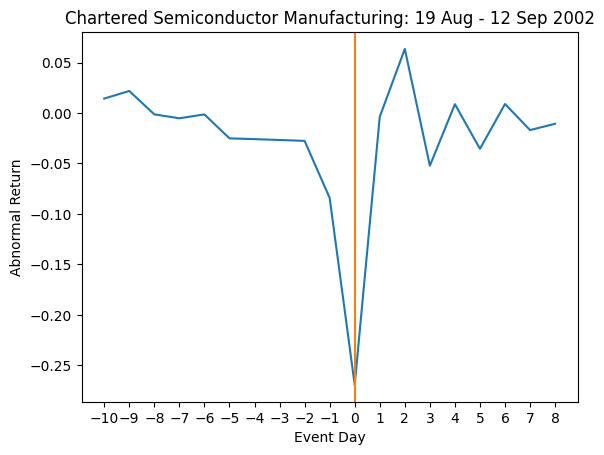

In [18]:
MeAR=Y3-np.mean(Y2)
time = range(-10,9,1)  ### range(start, stop, step)

import matplotlib.pyplot as plt
# plotting the points 
plt.plot(time, MeAR)

plt.xticks([-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,+1,+2,+3,+4,+5,+6,+7,+8])

plt.plot((0, 0), (-1, 1), scaley = False)

# naming the x axis
plt.xlabel('Event Day')
# naming the y axis
plt.ylabel('Abnormal Return')
  
# giving a title to my graph
plt.title('Chartered Semiconductor Manufacturing: 19 Aug - 12 Sep 2002')
  
# function to show the plot
plt.show()

In [19]:
sd3=np.std(Y2-np.mean(Y2))
t_stat_MeAR=MeAR/sd3
print(t_stat_MeAR)

284    0.506650
285    0.774380
286   -0.047122
287   -0.184735
288   -0.048706
289   -0.889696
290   -0.917490
291   -0.946909
292   -0.978100
293   -2.980481
294   -9.547722
295   -0.133264
296    2.250405
297   -1.850396
298    0.309710
299   -1.256973
300    0.316809
301   -0.599213
302   -0.377374
Name: CSI_Ret, dtype: float64


# Plotting Standardized Abnormal Returns of 3 Benchmarks

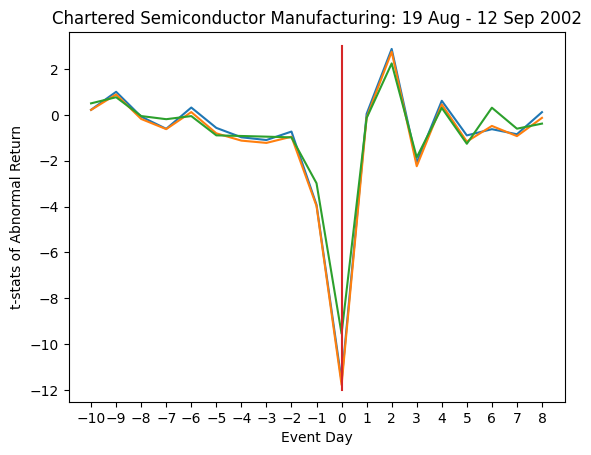

In [20]:
time = range(-10,9,1)  ### range(start, stop, step)

import matplotlib.pyplot as plt
# plotting the points 

plt.plot(time, t_stat_AR)
plt.plot(time, t_stat_MAR)
plt.plot(time, t_stat_MeAR)

plt.xticks([-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,+1,+2,+3,+4,+5,+6,+7,+8])

plt.plot((0, 0), (-12, 3), scaley = False)

# naming the x axis
plt.xlabel('Event Day')
# naming the y axis
plt.ylabel('t-stats of Abnormal Return')
  
# giving a title to my graph
plt.title('Chartered Semiconductor Manufacturing: 19 Aug - 12 Sep 2002')
  
# function to show the plot
plt.show()